In [1]:
# import sentiment analysis packages
import pandas as pd
from pattern.en import sentiment

# sentiment analysis visualization libraries

import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# running a sentiment analysis on the dataset

top25 = pd.read_csv("Top25_Books_Data - Sheet1.csv")

intros = top25['response']

sentiment_list= []
for i in intros:
    sentiment_list.append(sentiment(i))

sent_df = pd.DataFrame(sentiment_list)
#print(sent_df)

c:\Users\Owner\miniconda3\Machine_Learning\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\Machine_Learning\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\Machine_Learning\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\Machine_Learning\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

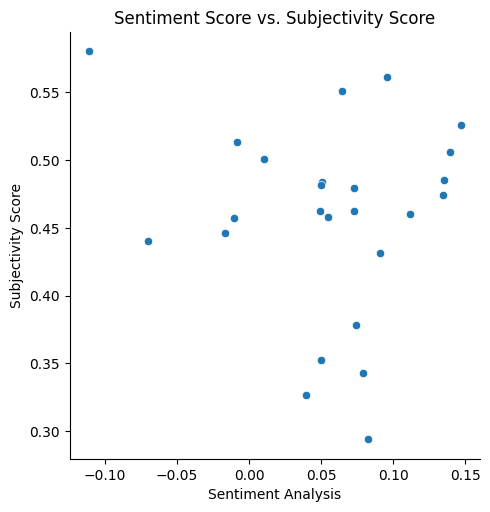

In [31]:
# sentiment analysis 

scatter_a = sns.relplot(data=sent_df, x=sent_df[0], y=sent_df[1])
scatter_a.set(xlabel='Sentiment Analysis',
              ylabel='Subjectivity Score',
              title='Sentiment Score vs. Subjectivity Score')

c:\Users\Owner\miniconda3\Machine_Learning\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\Machine_Learning\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\Machine_Learning\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\Machine_Learning\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

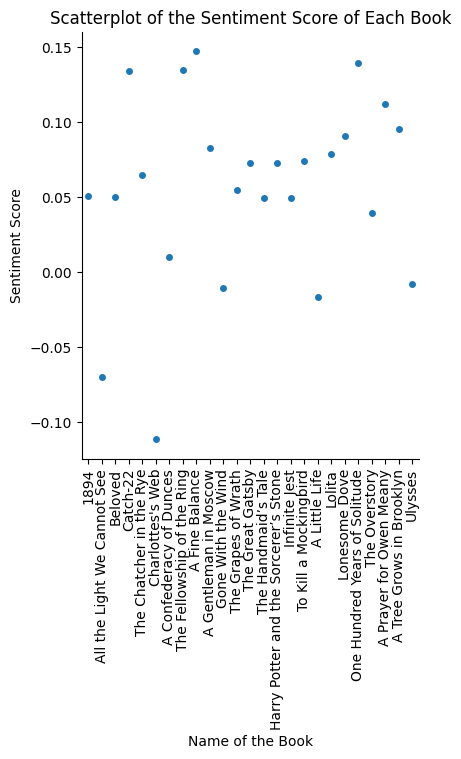

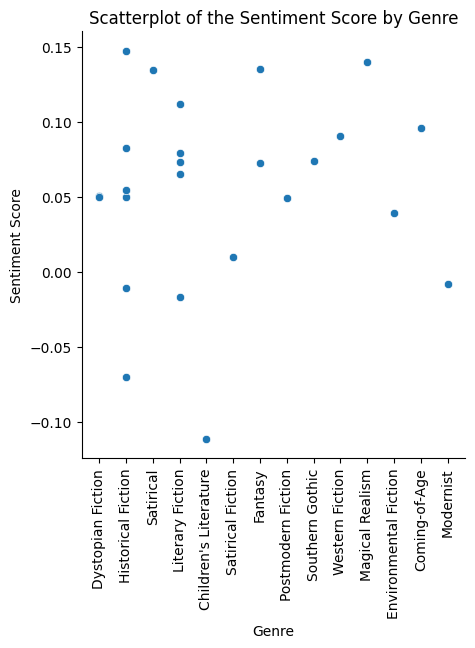

In [64]:
# sentiment analysis visualizations

intros_title = top25[['story_name', 'Genre', 'response']]

sentiment_list2= []
for i in intros_title['response']:
    sentiment_list2.append(sentiment(i)[0])

intros_title_genre = intros_title.assign(Sentiment_Score = sentiment_list2)

# data visualizations (title vs. sentiment)

title_sentiment = sns.catplot(data = intros_title_genre, x = "story_name", y = "Sentiment_Score")
title_sentiment.set_xticklabels(list(intros_title_genre['story_name']), rotation = 90)
title_sentiment.set(xlabel = 'Name of the Book',
                    ylabel = 'Sentiment Score', 
                    title = 'Scatterplot of the Sentiment Score of Each Book')

#print(title_sentiment)

# data visualizations pt 2 (genre vs. sentiment)

genre_sentiment = sns.relplot(data = intros_title_genre, x = "Genre", y = "Sentiment_Score")
plt.xticks(rotation=90)
genre_sentiment.set(xlabel = 'Genre',
                    ylabel = 'Sentiment Score', 
                    title = 'Scatterplot of the Sentiment Score by Genre')


In [4]:
# import libraries for syntactic analysis

import stanza

stanza.download('en')
nlp = stanza.Pipeline('en')

2023-09-24 19:14:14 INFO: Downloading default packages for language: en (English) ...
2023-09-24 19:14:20 INFO: File exists: C:\Users\Owner\stanza_resources\en\default.zip
2023-09-24 19:14:30 INFO: Finished downloading models and saved to C:\Users\Owner\stanza_resources.
2023-09-24 19:14:30 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2023-09-24 19:14:35 INFO: Loading these models for language: en (English):
| Processor    | Package             |
--------------------------------------
| tokenize     | combined            |
| pos          | combined_charlm     |
| lemma        | combined_nocharlm   |
| constituency | ptb3-revised_charlm |
| depparse     | combined_charlm     |
| sentiment    | sstplus             |
| ner          | ontonotes           |

2023-09-24 19:14:35 INFO: Using device: cpu
2023-09-24 19:14:35 INFO: Loading: tokenize
2023-09-24 19:14:35 INFO: Loading: pos
2023-09-24 19:14:36 INFO: Loading: lemma
2023-09-24 19:14:36 INFO: Loading: constituency
2023-09-24 19:14:37 INFO: Loading: depparse
2023-09-24 19:14:38 INFO: Loading: sentiment
2023-09-24 19:14:38 INFO: Loading: ner
2023-09-24 19:14:40 INFO: Done loading processors!


In [5]:
# additional libraries needed

from collections import Counter

In [6]:
# book list

#for i in intros:
    #syntax = nlp(i)
    #upos_syntax = syntax.get("upos")

pos_list = []
for i in intros:
    upos_by_book = nlp(i).get("upos")
    pos_val = Counter(upos_by_book)
    pos_list.append(pos_val)


In [10]:
# bar plot function

pos_df = pd.DataFrame(pos_list)
#print(pos_df)

pos_df_2 = pos_df.transpose()
pos_df_2 = pos_df_2.rename_axis('Parts of Speech')
#print(pos_df_2)


def s_barplot(i):
    s = pos_df_2[i]
    specific = s.plot.bar(x="Parts of Speech")
    specific.set_ylabel("Counts")
    specific.set_title("Barplot of the Part of Speech Counts for Each Introduction")
    return(specific)

Axes(0.125,0.11;0.775x0.77)


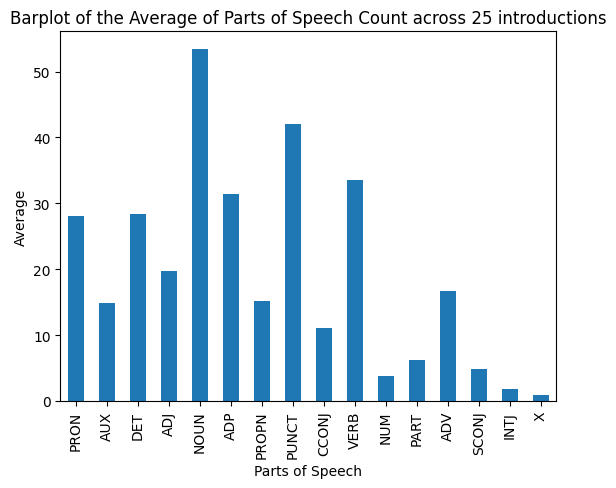

In [66]:
# average barplot across all 25

average_pos = pos_df_2.mean(axis=1)
average_bar = average_pos.plot.bar(x="Parts of Speech")
average_bar.set_title("Barplot of the Average of Parts of Speech Count across 25 introductions")
average_bar.set_ylabel("Average")

print(average_bar)